### Criação do RFM com a base de dados online retail

In [140]:
#import library
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import squarify as sq
import calendar
import warnings
warnings.filterwarnings('ignore')
import os

#### Primeiro vamos mudar o diretório para onde estão salvo os dados e depois carrega-los

In [29]:
os.chdir("C:\\Github\\Python\\LTV\\Dataset")
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [30]:
#Vamos ver a quantidade de linhas e colunas que a base de dados possui
df.shape

(541909, 8)

In [31]:
#Vamos explorar os dados fazendo uma análise descritiva para os dados númericos e ver o que temos
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


##### Observamos que temos quantidade e preços unitário com vaores negativos. Vamos tentar entender o porque desses valores

In [32]:
vl_ng = df.loc[df['Quantity'] < 0]
vl_ng

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


##### Pode-se perceber que os valores negativos estão atrelados ao InvoiceNo que começa com a letra C, indicando cancelamento, com isso iremos excluir esses valores

In [33]:
df = df.loc[df['Quantity'] > 0]
df.describe()

,Quantity,UnitPrice,CustomerID
count,531285.000000,531285.000000,397924.000000
mean,10.655262,3.857296,15294.315171
std,156.830323,41.810047,1713.169877
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


##### Mesmo aós tirar os valores negativos ainda temos preços com valores negativos. Fazendo uma análise rápida os valores negativos possue a letrs A na frente do InvoiceNo, nesse caso não sei o que representa mas, para o estudo não faz sentido. Por esse motivo irei excluir também.

In [34]:
df = df.loc[df['UnitPrice'] > 0]
df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


##### Agora sim temos valores que fazem sentido. Farei algumas análises para entender o dataset
##### Vou analisar primeiro qual o país com mais vendas.

Text(0.5, 1.0, 'Número de vendas por País')

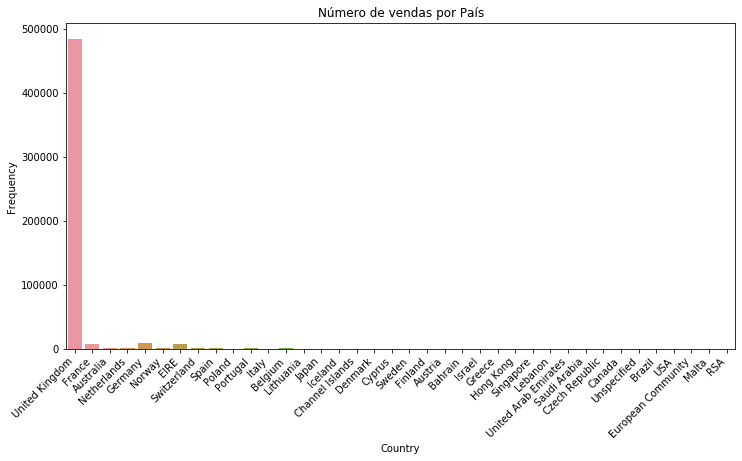

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Country', data = df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Número de vendas por País')

##### Pelo gráfico acima a maior quantidade de compras são no Reino Unido. Para o estudo vou utilizar apenas essa massa de dados.

In [36]:
df_uk = df.loc[df['Country'] == 'United Kingdom']
df_uk.shape

(485123, 8)

In [37]:
df_uk.describe()

,Quantity,UnitPrice,CustomerID
count,485123.000000,485123.000000,354321.000000
mean,9.610738,3.849679,15552.486392
std,161.904143,34.677371,1594.527150
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,14194.000000
50%,3.000000,2.100000,15522.000000
75%,10.000000,4.130000,16931.000000
max,80995.000000,13541.330000,18287.000000


In [38]:
#Quantos consumidores únicos temos?
df_uk['CustomerID'].nunique()

3920

In [39]:
#Aqui já vou criar a quantidade total de cada compra gerou de receita final multiplicando a quantidade vezes o valor do produto
df_uk['Total_Purchase'] = df_uk['Quantity'] * df_uk['UnitPrice']
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Purchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [40]:
# Quantidade de compras por ano no Reino Unido
df_uk.InvoiceDate.dt.year.value_counts()

2011    445899
2010     39224
Name: InvoiceDate, dtype: int64

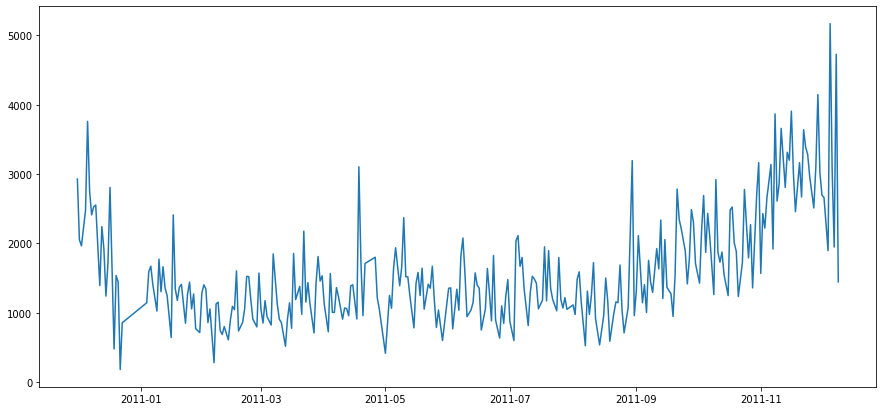

In [41]:
plt.figure(figsize=(15,7))
df_uk.InvoiceDate.dt.date.value_counts().plot()

##### O ano de 2010 começou com a quantidade de compras caindo, depois manteve-se estável em 2011 até setembro e a partir de setembro começou a aumentar a quantidade de vendas

In [42]:
#Valor total de venda por ano
df_uk['Year'] = df_uk.InvoiceDate.dt.year
df_uk.groupby('Year').agg({'Total_Purchase': 'sum'})

,Total_Purchase
Year,
2010,7.482690e+05
2011,8.276953e+06


##### Como temos uma quantidade pequena de meses no ano de 2010 e o valor monetário é bem inferior ao do ano de 2011, irei utilizar apenas o ano de 2011 para analisar.

In [43]:
df_uk = df_uk.loc[df_uk['Year'] >= 2011]

In [44]:
df_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Purchase,Year
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5,2011
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5,2011
...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.4,2011
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.6,2011
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.0,2011
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.8,2011


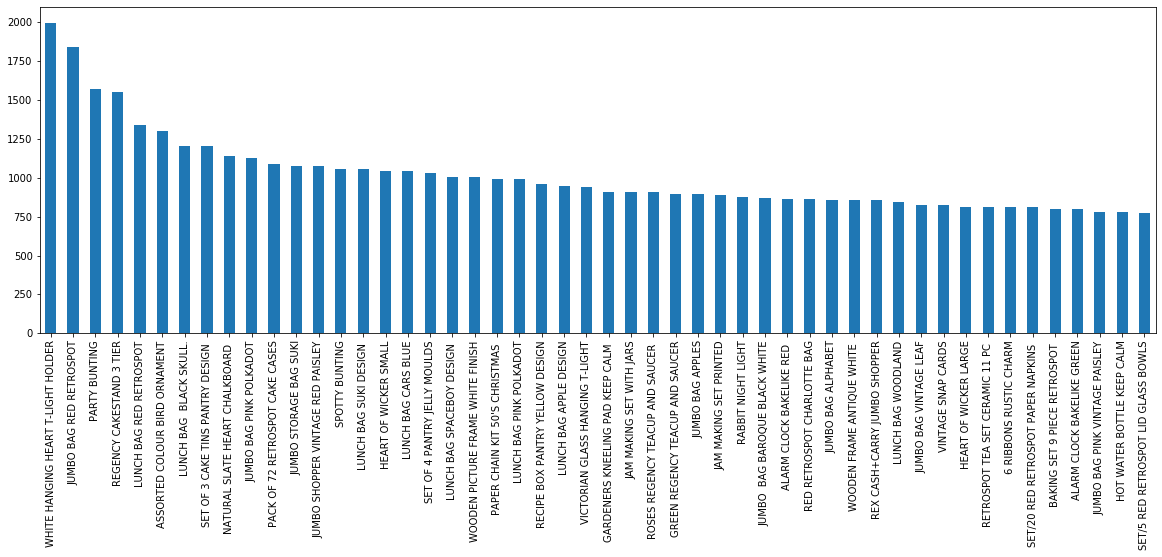

In [45]:
#Uma ideia dos 50 produtos mais "comprados" em 2011 em UK. Coloquei entre aspas comprados porque não multipliquei pela variavel quantity
plt.figure(figsize=(20,6))
df_uk['Description'].value_counts().head(50).plot(kind = 'bar')

In [46]:
#Cria a variavel mês
df_uk['Date'] = df_uk['InvoiceDate'].dt.date
df_uk['Month'] = df_uk['Date'].apply(lambda x: x.strftime("%b"))

Text(0.5, 1.0, 'Número de vendas por mês')

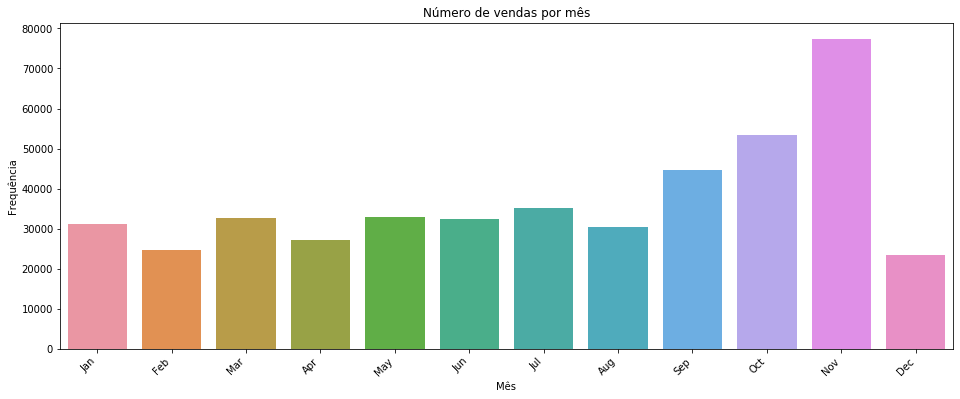

In [47]:
#Quantidade de vendas por mês
plt.figure(figsize=(16,6))
sns.countplot(x = 'Month', data = df_uk)
plt.xticks(rotation=45, horizontalalignment='right')
plt.xlabel('Mês')
plt.ylabel('Frequência')
plt.title('Número de vendas por mês')

##### Pode-se perceber que em geral, no ano de 20211, a quantidade de vendas não oscilou muito até agosto. Nos meses de Setembro, Outubro e Novembro (maior pico) teve um aumento e em dezembro a quantidade de vendas diminuiu. Será que em novembro o aumento pode ter sido ocasionado pela black friday (caso exista no local)?

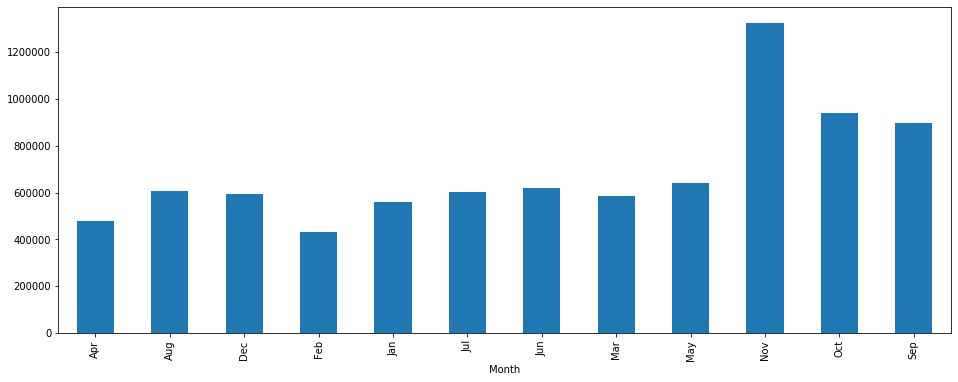

In [48]:
#Como era esperado, a maior quantidade de gasto ocorreu em Novembro
plt.figure(figsize=(16,6))
df_uk.groupby('Month')['Total_Purchase'].sum().plot.bar()

##### Podem ser feito outros estudos com a base de dados, explorando mais informações. Mas agora irei criar o modelo de RFM 

In [49]:
#Seleciona as variaveis para construir o RFM
uk_rfm = df_uk[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [50]:
#Como anteriormente, calcula o total gasto
uk_rfm['TotalPurchase'] = uk_rfm['Quantity'] * uk_rfm['UnitPrice']

##### Aqui será calculado um agregado de informação. Quantas dias da última compra (será considerada a data máxima da última compra como referência), o número de compras por consumidor, e o total do valor de compras por consumidor.

In [73]:
uk_rfm_group = uk_rfm.groupby('CustomerID').agg({'InvoiceDate': lambda date: (date.max() - date.min()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPurchase': lambda price: price.sum()})

In [74]:
#Renomeia o nome das colunas
uk_rfm_group.columns=['Qtd_dias_ult_compra','Num_total_Compras','Valor_total']
uk_rfm_group

,Qtd_dias_ult_compra,Num_total_Compras,Valor_total
CustomerID,,,
12346.0,0,1,77183.60
12747.0,321,88,3489.74
12748.0,337,3927,29491.60
12749.0,209,199,4090.88
12820.0,323,59,942.34
...,...,...,...
18280.0,0,10,180.60
18281.0,0,7,80.82
18282.0,118,12,178.05


In [97]:
#Criando os quantiles
Quartiles = uk_rfm_group[['Qtd_dias_ult_compra', 'Num_total_Compras', 'Valor_total']].quantile([.2, .4, .6, 0.8]).to_dict()
Quartiles

{'Qtd_dias_ult_compra': {0.2: 0.0,
  0.4: 20.0,
  0.6: 145.19999999999982,
  0.8: 248.0},
 'Num_total_Compras': {0.2: 13.0, 0.4: 28.0, 0.6: 56.0, 0.8: 115.0},
 'Valor_total': {0.2: 232.84800000000004,
  0.4: 453.576,
  0.6: 871.9799999999996,
  0.8: 1864.1840000000004}}

In [100]:
#Função para o R e M
def r_score(x):
    if x <= Quartiles['Qtd_dias_ult_compra'][.2]:
        return 5
    elif x <= Quartiles['Qtd_dias_ult_compra'][.4]:
        return 4
    elif x <= Quartiles['Qtd_dias_ult_compra'][.6]:
        return 3
    elif x <= Quartiles['Qtd_dias_ult_compra'][.8]:
        return 2
    else:
        return 1

#Função para o F
def fm_score(x, c):
    if x <= Quartiles[c][.2]:
        return 1
    elif x <= Quartiles[c][.4]:
        return 2
    elif x <= Quartiles[c][.6]:
        return 3
    elif x <= Quartiles[c][.8]:
        return 4
    else:
        return 5    

In [101]:
#Aloca os valores no dataframe
uk_rfm_group['R'] = uk_rfm_group['Qtd_dias_ult_compra'].apply(lambda x: r_score(x))
uk_rfm_group['F'] = uk_rfm_group['Num_total_Compras'].apply(lambda x: fm_score(x, 'Num_total_Compras'))
uk_rfm_group['M'] = uk_rfm_group['Valor_total'].apply(lambda x: fm_score(x, 'Valor_total'))

In [102]:
#Cria o score do RFM
uk_rfm_group['RFM Score'] = uk_rfm_group['R'].map(str) + uk_rfm_group['F'].map(str) + uk_rfm_group['M'].map(str)
uk_rfm_group

,Qtd_dias_ult_compra,Num_total_Compras,Valor_total,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
12346.0,0,1,77183.60,5,1,5,515,about to sleep
12747.0,321,88,3489.74,1,4,5,145,at risk
12748.0,337,3927,29491.60,1,5,5,155,at risk
12749.0,209,199,4090.88,2,5,5,255,at risk
12820.0,323,59,942.34,1,4,4,144,at risk
...,...,...,...,...,...,...,...,...
18280.0,0,10,180.60,5,1,1,511,about to sleep
18281.0,0,7,80.82,5,1,1,511,about to sleep
18282.0,118,12,178.05,3,1,1,311,hibernating


In [103]:
#Cria os segmentos
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

uk_rfm_group['Segment'] = uk_rfm_group['R'].map(str) + uk_rfm_group['F'].map(str)
uk_rfm_group['Segment'] = uk_rfm_group['Segment'].replace(segt_map, regex=True)
uk_rfm_group.head()

,Qtd_dias_ult_compra,Num_total_Compras,Valor_total,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
12346.0,0,1,77183.60,5,1,5,515,new customers
12747.0,321,88,3489.74,1,4,5,145,at risk
12748.0,337,3927,29491.60,1,5,5,155,can't loose
12749.0,209,199,4090.88,2,5,5,255,can't loose
12820.0,323,59,942.34,1,4,4,144,at risk


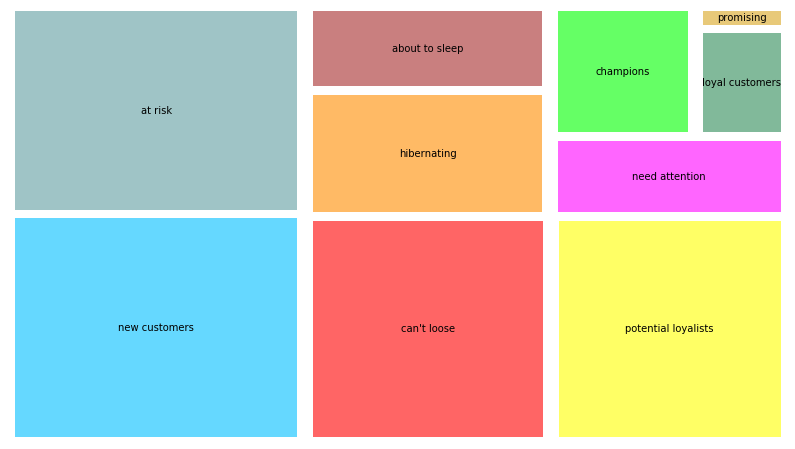

In [174]:
#Gráfico de treemap
plt.figure(figsize=(14,8))
plt.axis('off')
sq.plot(sizes = pd.value_counts(uk_rfm_group['Segment']), label = uk_rfm_group['Segment'].unique(), pad = True,
       alpha = 0.6, text_kwargs={'fontsize': 10}, color=['deepskyblue', 'cadetblue', 'red',
                                                        'yellow', 'darkorange', 'brown', 'magenta',
                                                        'lime', 'seagreen', 'goldenrod'])

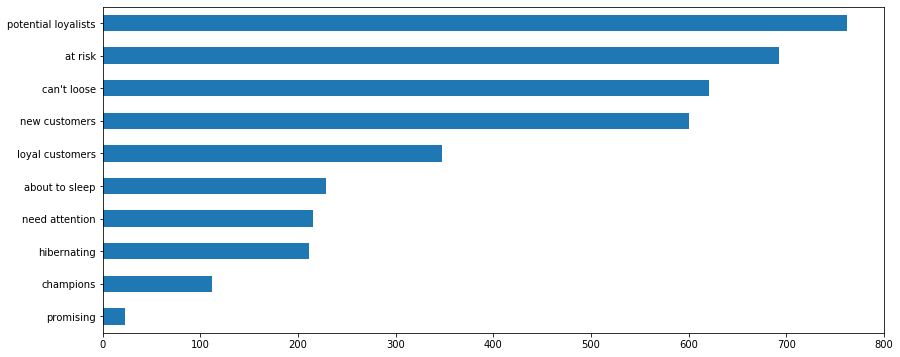

In [191]:
#Gráfico de barras para aproximadamente os valores em cada segmento
plt.figure(figsize=(14 , 6))
uk_rfm_group['Segment'].value_counts().sort_values(ascending = True).plot.barh()